<a href="https://colab.research.google.com/github/luanfelixcoding/storytelling-covid/blob/master/data_cleaning/data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [182]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

df_br = pd.read_csv('/content/Indic_BR/Indic_BR2023.csv', sep=';', encoding='utf-8')
df_geo = pd.read_csv('/content/Indic_Geo/Indic_Geo2023.csv', sep=';', encoding='utf-8')
df_esc = pd.read_csv('/content/Rend_Escolar/Rend_Escolar2023.csv', sep=';', encoding='utf-8')

In [183]:
def padronizar_colunas(df):
    """
    Remove quebras de linha, espaços extras e substitui espaços por underscores nos nomes das colunas de um DataFrame.
    """
    df.columns = [
        col.replace('\n', '').replace('\r', '').strip().replace(' ', '_')
        for col in df.columns
    ]
    return df

def ajustar_ticks_eixo_x(df, coluna_ano='Ano'):
    """
    Ajusta o eixo x do matplotlib para exibir apenas anos inteiros
    presentes na coluna especificada do DataFrame.

    Parâmetros:
    - df: pandas.DataFrame contendo os dados
    - coluna_ano: str, nome da coluna com os anos
    """
    anos = sorted(df[coluna_ano].dropna().unique())
    plt.xticks(ticks=anos, labels=[str(int(ano)) for ano in anos])

In [ ]:
padronizar_colunas(df_esc)

tax_columns = df_esc.columns[df_esc.columns.str.contains('Taxa|Ano|Série|Fundamental|Médio')]
df_esc_limpo = df_esc.copy()

for col in tax_columns:
    df_esc_limpo[col] = df_esc_limpo[col].astype(str).str.replace(',', '.').str.replace('%', '')
    df_esc_limpo[col] = pd.to_numeric(df_esc_limpo[col], errors='coerce')

df_esc_limpo

In [184]:
# Caminho dos arquivos da base Indic_BR (indicadores do Brasil por ano)
caminho_base = '/content/Indic_BR'
anos = list(range(2019, 2024))  # Lista de anos de 2019 a 2023
lista_df = []  # Lista para armazenar os DataFrames de cada ano

# Loop para carregar os arquivos Indic_BR de cada ano
for ano in anos:
    arquivo = os.path.join(caminho_base, f'Indic_BR{ano}.csv')  # Monta o caminho do arquivo
    df_indic_br = pd.read_csv(arquivo, sep=';', encoding='utf-8')  # Lê o CSV com separador ';'
    padronizar_colunas(df_indic_br)  # Padroniza os nomes das colunas (função customizada)
    df_indic_br['Ano'] = ano  # Adiciona a coluna "Ano" ao DataFrame
    lista_df.append(df_indic_br)  # Adiciona o DataFrame à lista

# Caminho dos arquivos da base Indic_Geo (indicadores geográficos)
caminho_base_geo = '/content/Indic_Geo'
anos = list(range(2019, 2024))
lista_geo = []  # Lista para armazenar os DataFrames geográficos por ano

# Loop para carregar os arquivos Indic_Geo
for ano in anos:
    arquivo = os.path.join(caminho_base_geo, f'Indic_Geo{ano}.csv')  # Caminho do arquivo por ano
    df_indic_geo = pd.read_csv(arquivo, sep=';', encoding='utf-8')  # Lê o CSV
    padronizar_colunas(df_indic_geo)  # Remove quebras de linha e espaços dos nomes das colunas
    df_indic_geo['Ano'] = ano  # Adiciona a coluna "Ano"
    lista_geo.append(df_indic_geo)  # Adiciona à lista

# Caminho dos arquivos da base de rendimento escolar
caminho_base_escolar = '/content/Rend_Escolar'
anos = list(range(2019, 2024))
lista_esc = []  # Lista para armazenar os DataFrames escolares por ano

# Loop para carregar os arquivos Rend_Escolar
for ano in anos:
    arquivo = os.path.join(caminho_base_escolar, f'Rend_Escolar{ano}.csv')  # Caminho do arquivo
    df_rend_escolar = pd.read_csv(arquivo, sep=';', encoding='utf-8')  # Lê o CSV
    padronizar_colunas(df_rend_escolar)  # Padroniza nomes das colunas
    df_rend_escolar['Ano'] = ano  # Adiciona a coluna "Ano"
    lista_esc.append(df_rend_escolar)  # Adiciona à lista

# Padroniza colunas de DataFrames finais (caso sejam utilizados separadamente depois)
padronizar_colunas(df_br)
padronizar_colunas(df_geo)
padronizar_colunas(df_rend_escolar)


,Ano,Unidade_Geográfica,Localização,Dependência_Administrativa,Total_Taxa_de_Aprovação_Ensino_Fundamental,Anos_Iniciais,Anos_Finais,1º_Ano,2º_Ano,3º_Ano,...,6º_Ano.2,7º_Ano.2,8º_Ano.2,9º_Ano.2,Total__Taxa_de_Abandono__Ensino_Médio,1ª_série.2,2ª_série.2,3ª_série.2,4ª_série.2,Não-Seriado.2
0,2023,Brasil,Total,Total,"95,8","97,2",94,99,"98,4","95,8",...,"0,9","1,1","1,4","1,4","3,4","3,6","3,4","2,7","2,5","6,2"
1,2023,Brasil,Urbana,Total,"96,2","97,6","94,5","99,1","98,4","96,2",...,"0,7","0,9","1,1","1,2","3,3","3,6","3,4","2,7","2,4","6,2"
2,2023,Brasil,Rural,Total,"93,1",95,"90,3","98,9","98,1","92,8",...,"2,1","2,6","3,2","2,8","3,6","3,9","3,4","3,2","4,3",7
3,2023,Brasil,Total,Federal,"96,5","98,2","95,9","98,6","97,6","97,8",...,0,"0,1","0,1","0,1","1,4","1,4",1,"1,2",2,"3,2"
4,2023,Brasil,Urbana,Federal,"96,5","98,2","95,9","98,6","97,6","97,8",...,0,"0,1","0,1","0,1","1,5","1,4","1,1","1,2","2,1","3,4"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,2023,Distrito Federal,Urbana,Privada,"99,1","99,7","98,2","99,9","99,9","99,6",...,0,0,0,0,"0,5",0,"0,1","0,2",--,"12,7"
583,2023,Distrito Federal,Rural,Privada,100,100,100,100,100,100,...,--,0,0,0,0,0,0,0,--,--
584,2023,Distrito Federal,Total,Pública,"93,9","95,1","92,5","98,2","98,9","87,5",...,1,"1,4","1,2","1,8","3,8",4,"4,5",3,--,--
585,2023,Distrito Federal,Urbana,Pública,"93,9","95,1","92,5","98,2","98,8","87,6",...,"1,1","1,5","1,2","1,8","3,9","4,1","4,6","2,9",--,--


In [185]:
# from google.colab import drive
# drive.mount('/content/drive')

### Indices Brasil Geral (analisar por idade)

In [186]:
indices_para_excluir = list(range(66, 70))  # 70 não incluso, vai até 69

df_br = df_br.drop(indices_para_excluir).reset_index(drop=True)
df_br

,Características_selecionadas,População_em_idade_de_trabalhar(1_000_pessoas),População_na_força_de_trabalho(1_000_pessoas),População_ocupada(1_000_pessoas),População_ocupada_em_trabalhos_formais_(1)(1_000_pessoas),População_desocupada(1_000_pessoas),População_na_força_de_trabalho_potencial(1_000_pessoas),População_subutilizada(1_000_pessoas),Taxa_de_participação_(%),Nível_de_ocupação_(%),Taxa_de_formalização_(%),Taxa_de_desocupação_(%),Taxa_composta_de_subutilização_(%)
0,Total Grupos de idade,168 365,107 669,94 956,55 639,12 713,8 280,28 234,"63,9","56,4","58,6","11,8","24,4"
1,14 a 29 anos,53 330,33 423,26 338,14 254,7 085,4 101,13 771,"62,7","49,4","54,1","21,2","36,7"
2,14 a 17 anos,12 425,2 555,1 494,260,1 061,1 287,2 627,"20,6",12,"17,4","41,5","68,4"
3,18 a 24 anos,23 952,16 961,12 866,6 684,4 095,1 968,7 399,"70,8","53,7",52,"24,1","39,1"
4,25 a 29 anos,16 952,13 907,11 978,7 310,1 929,846,3 744,82,"70,7",61,"13,9","25,4"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Total Preta ou parda,94 891,60 081,51 803,27 371,8 278,5 825,18 934,"63,3","54,6","52,8","13,8","28,7"
62,Sem instrução ou fundamental incompleto,36 713,17 304,15 190,5 112,2 113,2 565,6 592,"47,1","41,4","33,7","12,2","33,2"
63,Ensino fundamental completo ou médio incompleto,17 748,10 676,8 711,3 910,1 965,1 431,4 326,"60,2","49,1","44,9","18,4","35,7"
64,Ensino médio completo ou superior incompleto,31 850,24 725,21 074,13 132,3 650,1 663,6 899,"77,6","66,2","62,3","14,8","26,1"


In [187]:
for i, col in enumerate(df_br.columns):
    print(f"{i}: {col}")

0: Características_selecionadas
1: População_em_idade_de_trabalhar(1_000_pessoas)
2: População_na_força_de_trabalho(1_000_pessoas)
3: População_ocupada(1_000_pessoas)
4: População_ocupada_em_trabalhos_formais_(1)(1_000_pessoas)
5: População_desocupada(1_000_pessoas)
6: População_na_força_de_trabalho_potencial(1_000_pessoas)
7: População_subutilizada(1_000_pessoas)
8: Taxa_de_participação_(%)
9: Nível_de_ocupação_(%)
10: Taxa_de_formalização_(%)
11: Taxa_de_desocupação_(%)
12: Taxa_composta_de_subutilização_(%)


In [188]:
df_br.columns

Index(['Características_selecionadas',
       'População_em_idade_de_trabalhar(1_000_pessoas)',
       'População_na_força_de_trabalho(1_000_pessoas)',
       'População_ocupada(1_000_pessoas)',
       'População_ocupada_em_trabalhos_formais_(1)(1_000_pessoas)',
       'População_desocupada(1_000_pessoas)',
       'População_na_força_de_trabalho_potencial(1_000_pessoas)',
       'População_subutilizada(1_000_pessoas)', 'Taxa_de_participação_(%)',
       'Nível_de_ocupação_(%)', 'Taxa_de_formalização_(%)',
       'Taxa_de_desocupação_(%)', 'Taxa_composta_de_subutilização_(%)'],
      dtype='object')

In [189]:
# Lista das colunas para converter, excluindo 'Características_selecionadas'
colunas_para_converter = [col for col in df_br.columns if col != 'Características_selecionadas']

# Primeiro, convertendo para numérico com coerção de erros e trocando vírgula por ponto
for col in colunas_para_converter:
    df_br[col] = pd.to_numeric(df_br[col].str.replace(',', '.').str.strip(), errors='coerce')

# Agora, converter para inteiro (tratando valores NaN com fillna)
for col in colunas_para_converter:
    # Substituir NaN por 0 antes da conversão para inteiro
    df_br[col] = df_br[col].fillna(0).astype(int)

In [190]:
# Juntar todos os anos em um único DataFrame
df_all = pd.concat(lista_df, ignore_index=True)

# Filtrar somente os grupos de idade
grupos_idade = ['14 a 17 anos', '18 a 24 anos', '25 a 29 anos', '30 a 49 anos', '50 a 59 anos', '60 anos ou mais']
df_idade = df_all[df_all['Características_selecionadas'].isin(grupos_idade)]

df_idade

,Características_selecionadas,População_em_idade_de_trabalhar(1_000_pessoas),População_na_força_de_trabalho(1_000_pessoas),População_ocupada(1_000_pessoas),População_ocupada_em_trabalhos_formais_(1)(1_000_pessoas),População_desocupada(1_000_pessoas),População_na_força_de_trabalho_potencial(1_000_pessoas),População_subutilizada(1_000_pessoas),Taxa_de_participação_(%),Nível_de_ocupação_(%),Taxa_de_formalização_(%),Taxa_de_desocupação_(%),Taxa_composta_de_subutilização_(%),Ano
2,14 a 17 anos,12 425,2 555,1 494,260,1 061,1 287,2 627,"20,6",12,"17,4","41,5","68,4",2019
3,18 a 24 anos,23 952,16 961,12 866,6 684,4 095,1 968,7 399,"70,8","53,7",52,"24,1","39,1",2019
4,25 a 29 anos,16 952,13 907,11 978,7 310,1 929,846,3 744,82,"70,7",61,"13,9","25,4",2019
5,30 a 49 anos,62 626,51 589,47 269,29 789,4 321,2 621,10 313,"82,4","75,5",63,"8,4",19,2019
6,50 a 59 anos,23 405,15 681,14 671,8 753,1 010,877,2 796,67,"62,7","59,7","6,4","16,9",2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,18 a 24 anos,14 603,10 191,7 492,3 558,2 699,1 434,5 002,"69,8","51,3","47,5","26,5",43,2023
312,25 a 29 anos,9 940,7 924,6 675,3 750,1 249,625,2 526,"79,7","67,2","56,2","15,8","29,5",2023
313,30 a 49 anos,36 071,28 929,26 054,14 805,2 875,1 890,7 080,"80,2","72,2","56,8","9,9",23,2023
314,50 a 59 anos,12 394,8 049,7 448,3 926,601,572,1 761,"64,9","60,1","52,7","7,5","20,4",2023


In [191]:
# Corrigir o tipo da coluna 'Ano' e da coluna de valores
df_idade = df_idade.copy()
df_idade['Ano'] = df_idade['Ano'].astype(int)

# Remover espaços e transformar para float
df_idade['População_ocupada(1_000_pessoas)'] = df_idade['População_ocupada(1_000_pessoas)'].astype(str).str.replace(' ', '', regex=False).str.replace(',', '.', regex=False).astype(float)

df_idade['População_desocupada(1_000_pessoas)'] = df_idade['População_desocupada(1_000_pessoas)'].astype(str).str.replace(' ', '', regex=False).str.replace(',', '.', regex=False).astype(float)

df_idade['Nível_de_ocupação_(%)'] = df_idade['Nível_de_ocupação_(%)'].astype(str).str.replace(' ', '', regex=False).str.replace(',', '.', regex=False).astype(float)

df_idade['Taxa_de_desocupação_(%)'] = df_idade['Taxa_de_desocupação_(%)'].astype(str).str.replace(' ', '', regex=False).str.replace(',', '.', regex=False).astype(float)

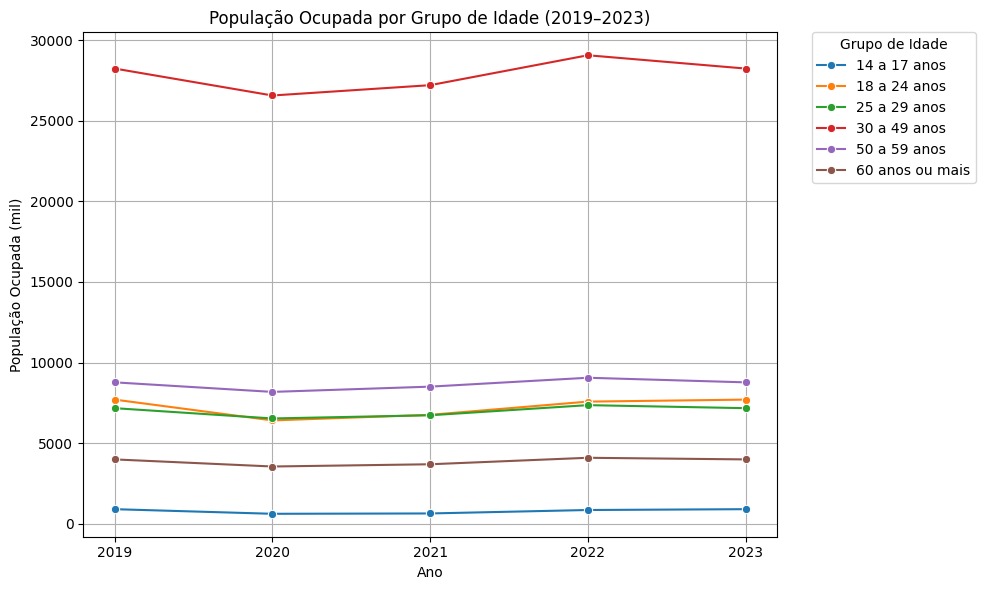

In [192]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_idade,
    x='Ano',
    y='População_ocupada(1_000_pessoas)',
    hue='Características_selecionadas',
    marker='o',
    errorbar=None
)

plt.title('População Ocupada por Grupo de Idade (2019–2023)')
plt.xlabel('Ano')
plt.ylabel('População Ocupada (mil)')
plt.grid(True)

# Legenda ao lado do gráfico
plt.legend(
    title='Grupo de Idade',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.
)

ajustar_ticks_eixo_x(df_idade)

plt.tight_layout()
plt.show()

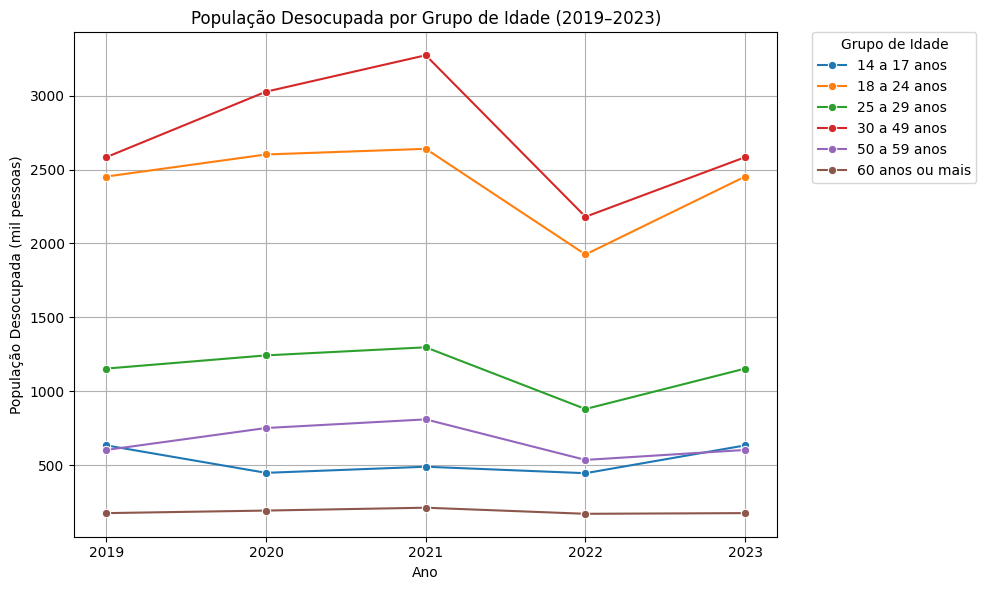

In [193]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_idade,
    x='Ano',
    y='População_desocupada(1_000_pessoas)',
    hue='Características_selecionadas',
    marker='o',
    errorbar=None
)

plt.title('População Desocupada por Grupo de Idade (2019–2023)')
plt.xlabel('Ano')
plt.ylabel('População Desocupada (mil pessoas)')
plt.grid(True)

# Legenda ao lado do gráfico
plt.legend(
    title='Grupo de Idade',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.
)

ajustar_ticks_eixo_x(df_idade)

plt.tight_layout()
plt.show()

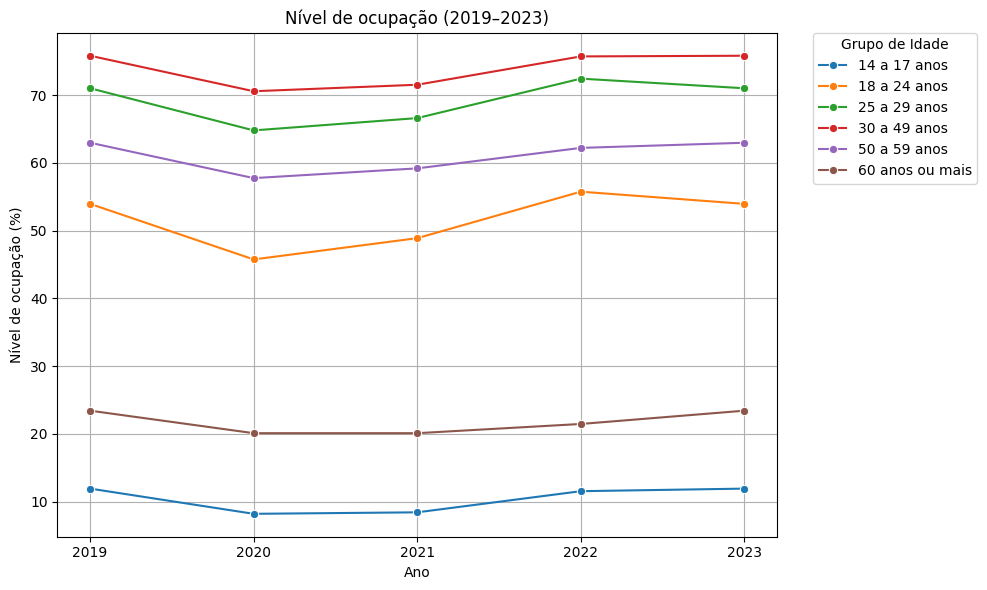

In [194]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_idade,
    x='Ano',
    y='Nível_de_ocupação_(%)',
    hue='Características_selecionadas',
    marker='o',
    errorbar=None
)

plt.title('Nível de ocupação (2019–2023)')
plt.xlabel('Ano')
plt.ylabel('Nível de ocupação (%)')
plt.grid(True)

# Legenda ao lado do gráfico
plt.legend(
    title='Grupo de Idade',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.
)

ajustar_ticks_eixo_x(df_idade)

plt.tight_layout()
plt.show()

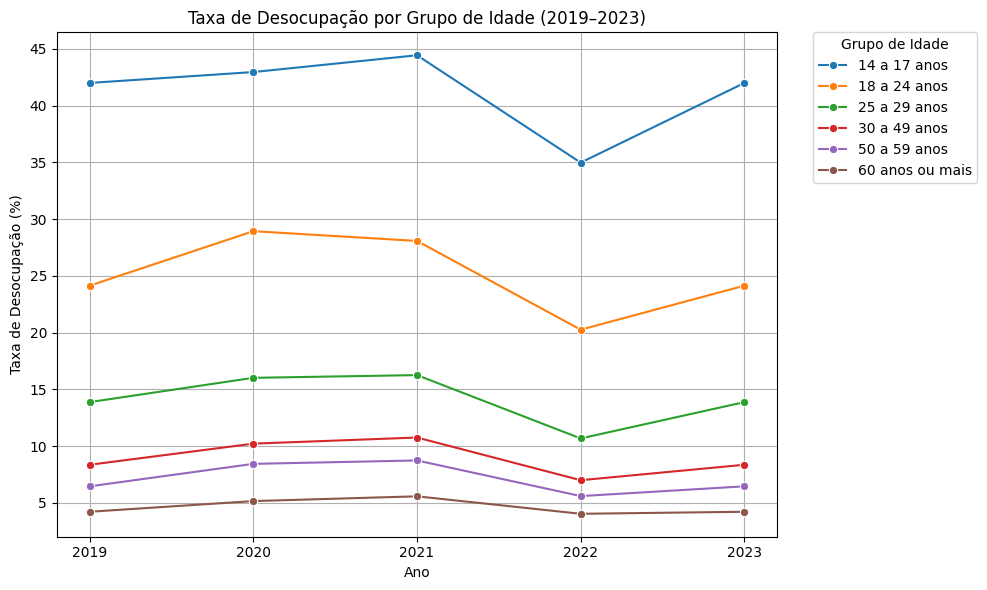

In [195]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_idade,
    x='Ano',
    y='Taxa_de_desocupação_(%)',
    hue='Características_selecionadas',
    marker='o',
    errorbar=None
)

plt.title('Taxa de Desocupação por Grupo de Idade (2019–2023)')
plt.xlabel('Ano')
plt.ylabel('Taxa de Desocupação (%)')
plt.grid(True)

# Legenda ao lado do gráfico (à direita)
plt.legend(
    title='Grupo de Idade',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.
)

ajustar_ticks_eixo_x(df_idade)

plt.tight_layout()
plt.show()

### Indices por Região (analisar mais afetadas)

In [196]:
df_geo.head()

,"Grandes_Regiões,_Unidades_da_Federação_e_Municípios",População_em_idade_de_trabalhar(1_000_pessoas),População_na_força_de_trabalho(1_000_pessoas),População_ocupada(1_000_pessoas),População_ocupada_em_trabalhos_formais_(1)(1_000_pessoas),População_desocupada(1_000_pessoas),População_na_força_de_trabalho_potencial(1_000_pessoas),População_subutilizada(1_000_pessoas),Taxa_de_participação_(%),Nível_de_ocupação_(%),Taxa_de_formalização_(%),Taxa_de_desocupação_(%),Taxa_composta_de_subutilização_(%)
0,Brasil,174 809,109 156,100 690,59 675,8 466,7 023,20 889,"62,4","57,6","59,3","7,8","18,0"
1,Norte,14 652,8 854,8 169,3 449,685,782,1 966,"60,4","55,8","42,2","7,7","20,4"
2,Rondônia,1 496,851,824,486,27,19,56,"56,9","55,1","59,0","3,2","6,5"
3,Porto Velho,476,259,248,139,11,3,15,"54,4","52,0","56,1","4,4","5,9"
4,Acre,691,342,316,152,25,36,68,"49,4","45,7","48,0","7,5","18,0"


In [197]:
indices_para_excluir = list(range(60, 64))  # 70 não incluso, vai até 69

df_geo = df_geo.drop(indices_para_excluir).reset_index(drop=True)

In [198]:
df_geo

,"Grandes_Regiões,_Unidades_da_Federação_e_Municípios",População_em_idade_de_trabalhar(1_000_pessoas),População_na_força_de_trabalho(1_000_pessoas),População_ocupada(1_000_pessoas),População_ocupada_em_trabalhos_formais_(1)(1_000_pessoas),População_desocupada(1_000_pessoas),População_na_força_de_trabalho_potencial(1_000_pessoas),População_subutilizada(1_000_pessoas),Taxa_de_participação_(%),Nível_de_ocupação_(%),Taxa_de_formalização_(%),Taxa_de_desocupação_(%),Taxa_composta_de_subutilização_(%)
0,Brasil,174 809,109 156,100 690,59 675,8 466,7 023,20 889,"62,4","57,6","59,3","7,8","18,0"
1,Norte,14 652,8 854,8 169,3 449,685,782,1 966,"60,4","55,8","42,2","7,7","20,4"
2,Rondônia,1 496,851,824,486,27,19,56,"56,9","55,1","59,0","3,2","6,5"
3,Porto Velho,476,259,248,139,11,3,15,"54,4","52,0","56,1","4,4","5,9"
4,Acre,691,342,316,152,25,36,68,"49,4","45,7","48,0","7,5","18,0"
5,Rio Branco,333,183,166,95,17,10,29,"55,2","50,0","57,0","9,3","15,0"
6,Amazonas,3 182,1 946,1 752,703,194,139,424,"61,2","55,1","40,1","9,9","20,3"
7,Manaus,1 826,1 161,1 025,558,135,45,220,"63,6","56,2","54,4","11,7","18,3"
8,Roraima,449,280,262,120,18,13,38,"62,5","58,4","45,7","6,6","12,8"
9,Boa Vista,326,216,201,101,16,10,31,"66,2","61,4","50,4","7,2","13,8"


In [199]:
# concatenar tudo em um DataFrame único
df_geo = pd.concat(lista_geo, ignore_index=True)

# Converter colunas numéricas (exceto a primeira e 'Ano')
colunas_num = df_geo.columns[1:-1].tolist()

for col in colunas_num:
    df_geo[col] = pd.to_numeric(df_geo[col].astype(str).str.replace(' ', '').str.replace(',', '.'), errors='coerce')

In [200]:
df_geo.columns

Index(['Grandes_Regiões,_Unidades_da_Federação_e_Municípios',
       'População_em_idade_de_trabalhar(1_000_pessoas)',
       'População_na_força_de_trabalho(1_000_pessoas)',
       'População_ocupada(1_000_pessoas)',
       'População_ocupada_em_trabalhos_formais_(1)(1_000_pessoas)',
       'População_desocupada(1_000_pessoas)',
       'População_na_força_de_trabalho_potencial(1_000_pessoas)',
       'População_subutilizada(1_000_pessoas)', 'Taxa_de_participação_(%)',
       'Nível_de_ocupação_(%)', 'Taxa_de_formalização_(%)',
       'Taxa_de_desocupação_(%)', 'Taxa_composta_de_subutilização_(%)', 'Ano'],
      dtype='object')

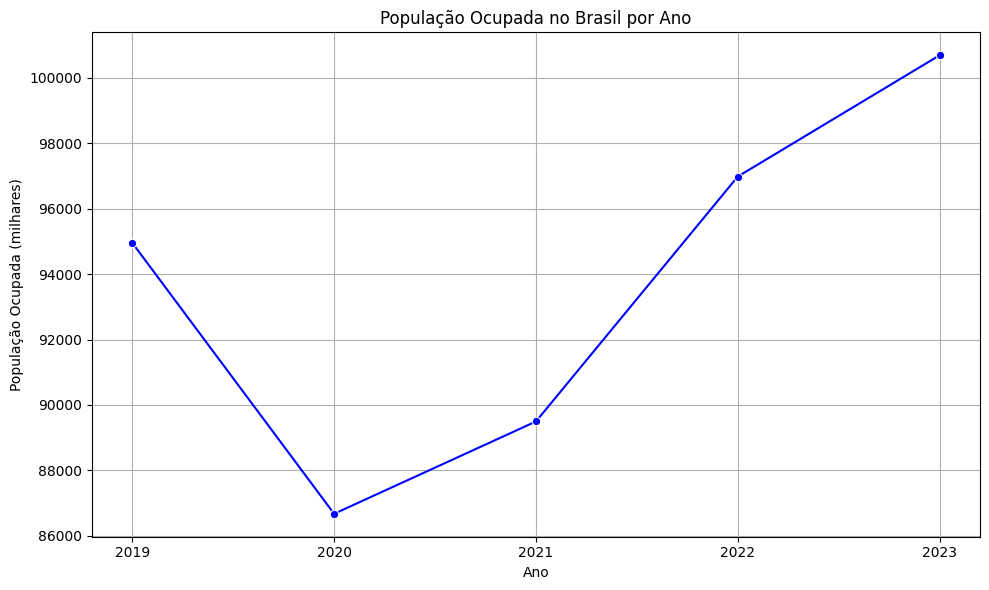

In [201]:
# Filtra apenas a linha do Brasil
df_brasil = df_geo[df_geo['Grandes_Regiões,_Unidades_da_Federação_e_Municípios'] == 'Brasil']

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_brasil,
    x='Ano',
    y='População_ocupada(1_000_pessoas)',
    marker='o',
    color='blue'
)

plt.title('População Ocupada no Brasil por Ano')
plt.ylabel('População Ocupada (milhares)')
plt.xlabel('Ano')
plt.grid(True)

ajustar_ticks_eixo_x(df_brasil)

plt.tight_layout()
plt.show()

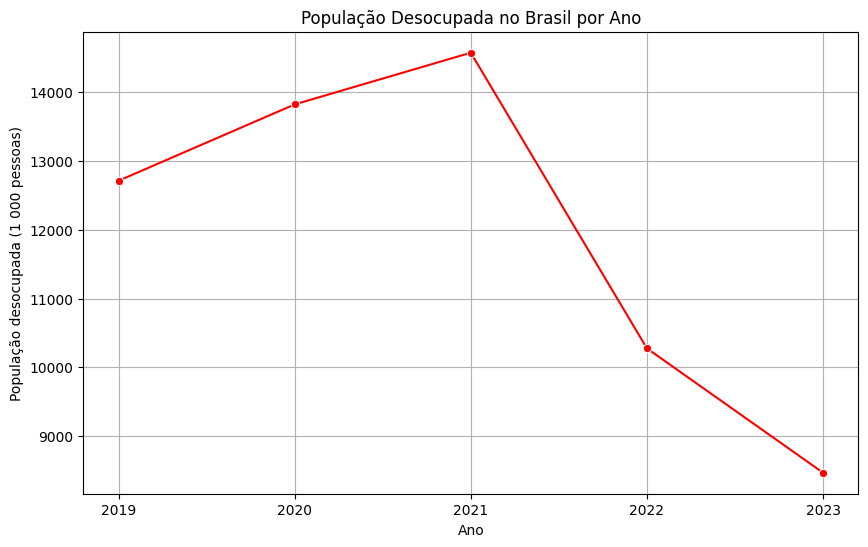

In [202]:
plt.figure(figsize=(10,6))
sns.lineplot(
    data=df_brasil,
    x='Ano',
    y='População_desocupada(1_000_pessoas)',
    marker='o',
    color='red'
)

plt.title('População Desocupada no Brasil por Ano')
plt.ylabel('População desocupada (1 000 pessoas)')
plt.xlabel('Ano')
plt.grid(True)

ajustar_ticks_eixo_x(df_brasil)

plt.show()

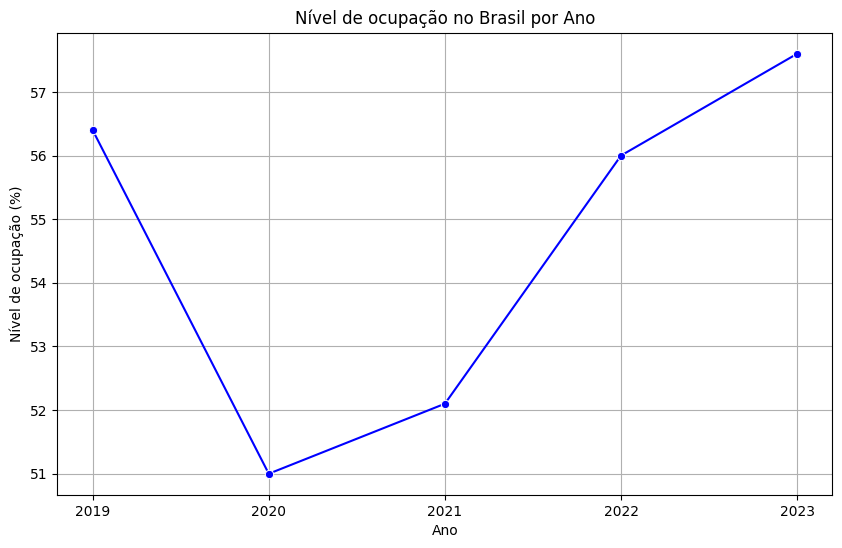

In [203]:
plt.figure(figsize=(10,6))
sns.lineplot(
    data=df_brasil,
    x='Ano',
    y='Nível_de_ocupação_(%)',
    marker='o',
    color='blue'
)

plt.title('Nível de ocupação no Brasil por Ano')
plt.ylabel('Nível de ocupação (%)')
plt.xlabel('Ano')
plt.grid(True)

ajustar_ticks_eixo_x(df_brasil)

plt.show()

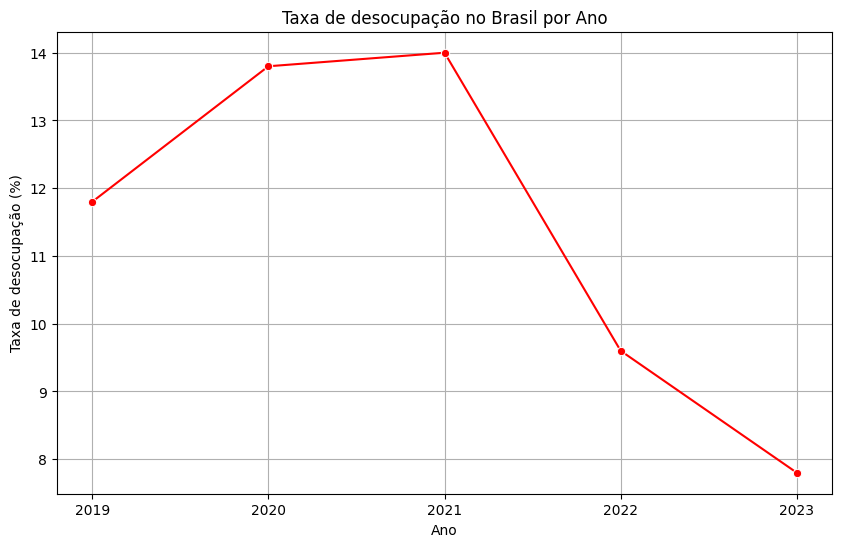

In [204]:
plt.figure(figsize=(10,6))
sns.lineplot(
    data=df_brasil,
    x='Ano',
    y='Taxa_de_desocupação_(%)',
    marker='o',
    color='red'
)

plt.title('Taxa de desocupação no Brasil por Ano')
plt.ylabel('Taxa de desocupação (%)')
plt.xlabel('Ano')
plt.grid(True)

ajustar_ticks_eixo_x(df_brasil)

plt.show()

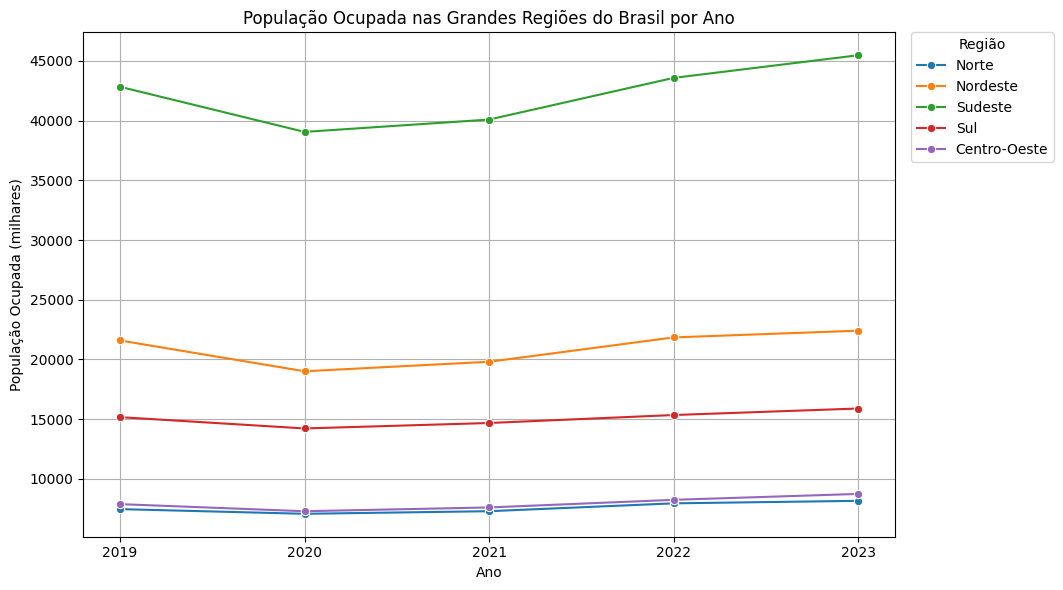

In [205]:
# Filtra apenas as grandes regiões
grandes_regioes = ['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste']
df_regioes = df_geo[df_geo['Grandes_Regiões,_Unidades_da_Federação_e_Municípios'].isin(grandes_regioes)]

# Criação do gráfico
plt.figure(figsize=(12,6))
sns.lineplot(
    data=df_regioes,
    x='Ano',
    y='População_ocupada(1_000_pessoas)',
    hue='Grandes_Regiões,_Unidades_da_Federação_e_Municípios',
    marker='o'
)

# Títulos e eixos
plt.title('População Ocupada nas Grandes Regiões do Brasil por Ano')
plt.ylabel('População Ocupada (milhares)')
plt.xlabel('Ano')
plt.grid(True)

# Legenda ao lado do gráfico
plt.legend(
    title='Região',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    borderaxespad=0
)

ajustar_ticks_eixo_x(df_regioes)

# Ajuste para não cortar nada
plt.tight_layout()
plt.subplots_adjust(right=0.75)

plt.show()

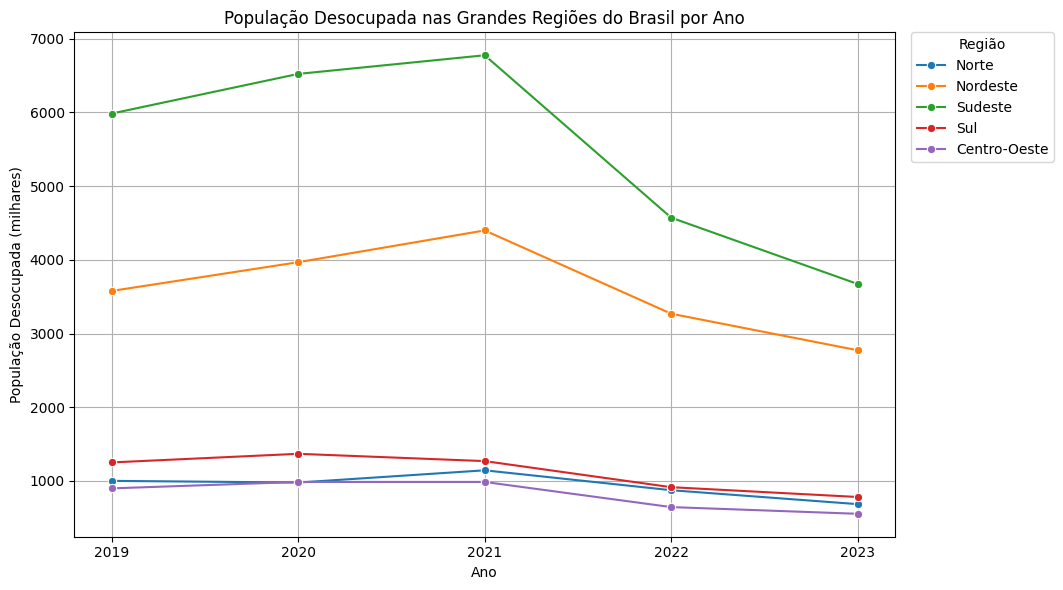

In [206]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=df_regioes,
    x='Ano',
    y='População_desocupada(1_000_pessoas)',
    hue='Grandes_Regiões,_Unidades_da_Federação_e_Municípios',
    marker='o'
)

# Títulos e rótulos
plt.title('População Desocupada nas Grandes Regiões do Brasil por Ano')
plt.ylabel('População Desocupada (milhares)')
plt.xlabel('Ano')
plt.grid(True)

# Legenda ao lado direito do gráfico
plt.legend(
    title='Região',
    bbox_to_anchor=(1.02, 1),  # posição à direita
    loc='upper left',
    borderaxespad=0
)

# Ajusta os ticks do eixo x para mostrar apenas anos inteiros
ajustar_ticks_eixo_x(df_regioes)

# Ajusta o layout para não cortar a legenda
plt.tight_layout()
plt.subplots_adjust(right=0.75)

plt.show()

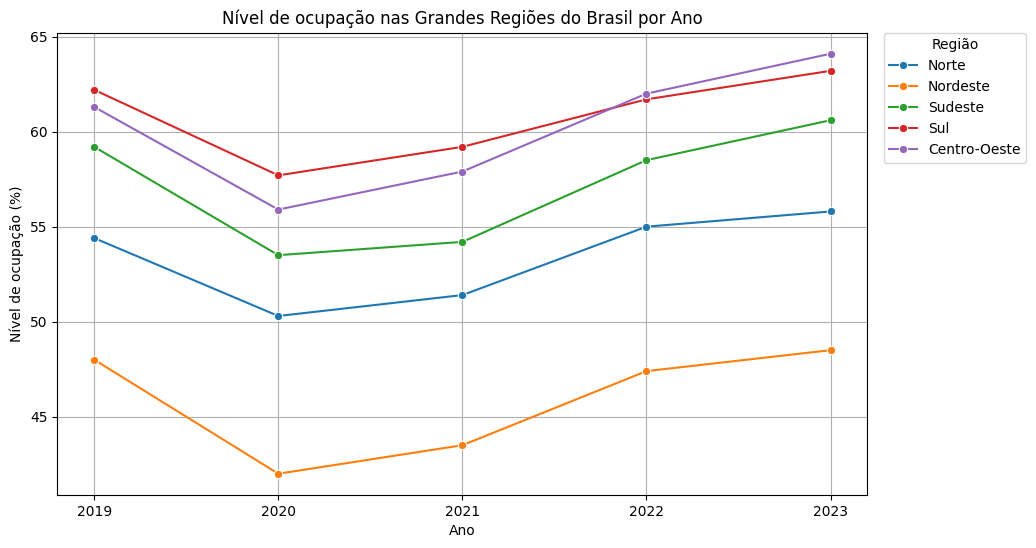

In [207]:
fig, ax = plt.subplots(figsize=(12,6))

sns.lineplot(
    data=df_regioes,
    x='Ano',
    y='Nível_de_ocupação_(%)',
    hue='Grandes_Regiões,_Unidades_da_Federação_e_Municípios',
    marker='o',
    ax=ax
)

ax.set_title('Nível de ocupação nas Grandes Regiões do Brasil por Ano')
ax.set_ylabel('Nível de ocupação (%)')
ax.set_xlabel('Ano')
ax.grid(True)

# Ajusta espaço para a legenda na direita
fig.subplots_adjust(right=0.8)

# Legenda fora do gráfico, à direita
ax.legend(
    title='Região',
    bbox_to_anchor=(1.02, 1),  # posição à direita, topo
    loc='upper left',
    borderaxespad=0
)

# Ajusta os ticks do eixo x para mostrar apenas anos inteiros
ajustar_ticks_eixo_x(df_regioes)

plt.show()


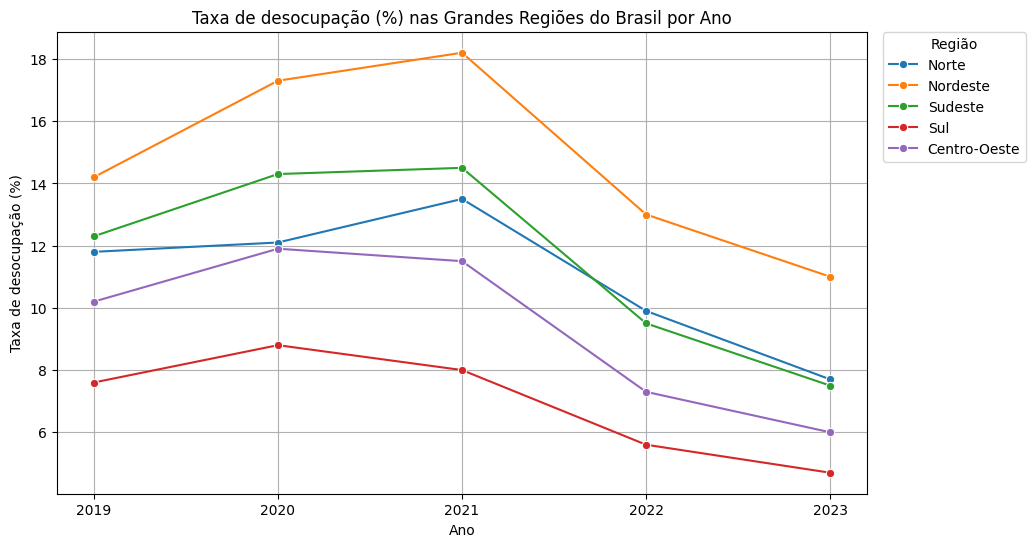

In [208]:
fig, ax = plt.subplots(figsize=(12,6))

sns.lineplot(
    data=df_regioes,
    x='Ano',
    y='Taxa_de_desocupação_(%)',
    hue='Grandes_Regiões,_Unidades_da_Federação_e_Municípios',
    marker='o',
    ax=ax
)

ax.set_title('Taxa de desocupação (%) nas Grandes Regiões do Brasil por Ano')
ax.set_ylabel('Taxa de desocupação (%)')
ax.set_xlabel('Ano')
ax.grid(True)

# Ajusta espaço para legenda à direita, fora do gráfico
fig.subplots_adjust(right=0.8)

# Legenda fora do gráfico, à direita, no topo
ax.legend(
    title='Região',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    borderaxespad=0
)

ajustar_ticks_eixo_x(df_regioes)

plt.show()

## Rendimento Escolar (Moda, Mediana, Desvio Padrão e Média)

In [212]:
df_esc.head()

,Ano,Unidade Geográfica,Localização,Dependência Administrativa,Total Taxa de Aprovação Ensino Fundamental,Anos Iniciais,Anos Finais,1º Ano,2º Ano,3º Ano,...,6º Ano.2,7º Ano.2,8º Ano.2,9º Ano.2,Total Taxa de Abandono Ensino Médio,1ª série.2,2ª série.2,3ª série.2,4ª série.2,Não-Seriado.2
0,2023,Brasil,Total,Total,"95,8","97,2",94,99,"98,4","95,8",...,"0,9","1,1","1,4","1,4","3,4","3,6","3,4","2,7","2,5","6,2"
1,2023,Brasil,Urbana,Total,"96,2","97,6","94,5","99,1","98,4","96,2",...,"0,7","0,9","1,1","1,2","3,3","3,6","3,4","2,7","2,4","6,2"
2,2023,Brasil,Rural,Total,"93,1",95,"90,3","98,9","98,1","92,8",...,"2,1","2,6","3,2","2,8","3,6","3,9","3,4","3,2","4,3",7
3,2023,Brasil,Total,Federal,"96,5","98,2","95,9","98,6","97,6","97,8",...,0,"0,1","0,1","0,1","1,4","1,4",1,"1,2",2,"3,2"
4,2023,Brasil,Urbana,Federal,"96,5","98,2","95,9","98,6","97,6","97,8",...,0,"0,1","0,1","0,1","1,5","1,4","1,1","1,2","2,1","3,4"


In [214]:
df_esc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 58 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Ano                                          587 non-null    int64 
 1   Unidade Geográfica                           587 non-null    object
 2   Localização                                  587 non-null    object
 3   Dependência Administrativa                   587 non-null    object
 4   Total Taxa de Aprovação Ensino Fundamental   587 non-null    object
 5   Anos Iniciais                                587 non-null    object
 6   Anos Finais                                  587 non-null    object
 7   1º Ano                                       587 non-null    object
 8   2º Ano                                       587 non-null    object
 9   3º Ano                                       587 non-null    object
 10  4º Ano        

In [217]:
padronizar_colunas(df_esc)
df_esc.columns

Index(['Ano', 'Unidade_Geográfica', 'Localização',
       'Dependência_Administrativa',
       'Total_Taxa_de_Aprovação_Ensino_Fundamental', 'Anos_Iniciais',
       'Anos_Finais', '1º_Ano', '2º_Ano', '3º_Ano', '4º_Ano', '5º_Ano',
       '6º_Ano', '7º_Ano', '8º_Ano', '9º_Ano',
       'Total_Taxa_de_Aprovação_Ensino_Médio', '1ª_série', '2ª_série',
       '3ª_série', '4ª_série', 'Não-Seriado',
       'Total_Taxa_de_Reprovação_Ensino_Fundamental', 'Anos_Iniciais.1',
       'Anos_Finais.1', '1º_Ano_.1', '2º_Ano.1', '3º_Ano.1', '4º_Ano.1',
       '5º_Ano.1', '6º_Ano.1', '7º_Ano.1', '8º_Ano.1', '9º_Ano.1',
       'Total_Taxa_de_Reprovação_Ensino_Médio', '1ª_série.1', '2ª_série.1',
       '3ª_série.1', '4ª_série.1', 'Não-Seriado.1',
       'Total_Taxa_de_Abandono_Ensino_Fundamental', 'Anos_Iniciais.2',
       'Anos_Finais.2', '1º_Ano_.2', '2º_Ano.2', '3º_Ano.2', '4º_Ano.2',
       '5º_Ano.2', '6º_Ano.2', '7º_Ano.2', '8º_Ano.2', '9º_Ano.2',
       'Total__Taxa_de_Abandono__Ensino_Médio', '1ª_sé

In [221]:
# Converter colunas com taxas para numérico
tax_columns = df_esc.columns[df_esc.columns.str.contains('Taxa|Ano|Série|Fundamental|Médio')]
df_esc_limpo = df_esc.copy()

for col in tax_columns:
    df_esc_limpo[col] = df_esc_limpo[col].astype(str).str.replace(',', '.').str.replace('%', '')
    df_esc_limpo[col] = pd.to_numeric(df_esc_limpo[col], errors='coerce')

df_esc_limpo

,Ano,Unidade_Geográfica,Localização,Dependência_Administrativa,Total_Taxa_de_Aprovação_Ensino_Fundamental,Anos_Iniciais,Anos_Finais,1º_Ano,2º_Ano,3º_Ano,...,6º_Ano.2,7º_Ano.2,8º_Ano.2,9º_Ano.2,Total__Taxa_de_Abandono__Ensino_Médio,1ª_série.2,2ª_série.2,3ª_série.2,4ª_série.2,Não-Seriado.2
0,2023,Brasil,Total,Total,95.8,97.2,94.0,99.0,98.4,95.8,...,0.9,1.1,1.4,1.4,3.4,"3,6","3,4","2,7","2,5","6,2"
1,2023,Brasil,Urbana,Total,96.2,97.6,94.5,99.1,98.4,96.2,...,0.7,0.9,1.1,1.2,3.3,"3,6","3,4","2,7","2,4","6,2"
2,2023,Brasil,Rural,Total,93.1,95.0,90.3,98.9,98.1,92.8,...,2.1,2.6,3.2,2.8,3.6,"3,9","3,4","3,2","4,3",7
3,2023,Brasil,Total,Federal,96.5,98.2,95.9,98.6,97.6,97.8,...,0.0,0.1,0.1,0.1,1.4,"1,4",1,"1,2",2,"3,2"
4,2023,Brasil,Urbana,Federal,96.5,98.2,95.9,98.6,97.6,97.8,...,0.0,0.1,0.1,0.1,1.5,"1,4","1,1","1,2","2,1","3,4"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,2023,Distrito Federal,Urbana,Privada,99.1,99.7,98.2,99.9,99.9,99.6,...,0.0,0.0,0.0,0.0,0.5,0,"0,1","0,2",--,"12,7"
583,2023,Distrito Federal,Rural,Privada,100.0,100.0,100.0,100.0,100.0,100.0,...,NaN,0.0,0.0,0.0,0.0,0,0,0,--,--
584,2023,Distrito Federal,Total,Pública,93.9,95.1,92.5,98.2,98.9,87.5,...,1.0,1.4,1.2,1.8,3.8,4,"4,5",3,--,--
585,2023,Distrito Federal,Urbana,Pública,93.9,95.1,92.5,98.2,98.8,87.6,...,1.1,1.5,1.2,1.8,3.9,"4,1","4,6","2,9",--,--


In [240]:
# Selecionar colunas-chave para análise
colunas_chave = [
    'Total_Taxa_de_Aprovação_Ensino_Médio',
    'Total__Taxa_de_Abandono__Ensino_Médio',
]

# Estatísticas descritivas
print(df_esc_limpo[colunas_chave].describe())

       Total_Taxa_de_Aprovação_Ensino_Médio  \
count                            538.000000   
mean                              91.705576   
std                                5.327502   
min                               71.200000   
25%                               88.300000   
50%                               92.500000   
75%                               96.100000   
max                              100.000000   

       Total__Taxa_de_Abandono__Ensino_Médio  
count                             538.000000  
mean                                2.889777  
std                                 2.708004  
min                                 0.000000  
25%                                 0.800000  
50%                                 2.200000  
75%                                 4.000000  
max                                14.900000  


## BoxPlots

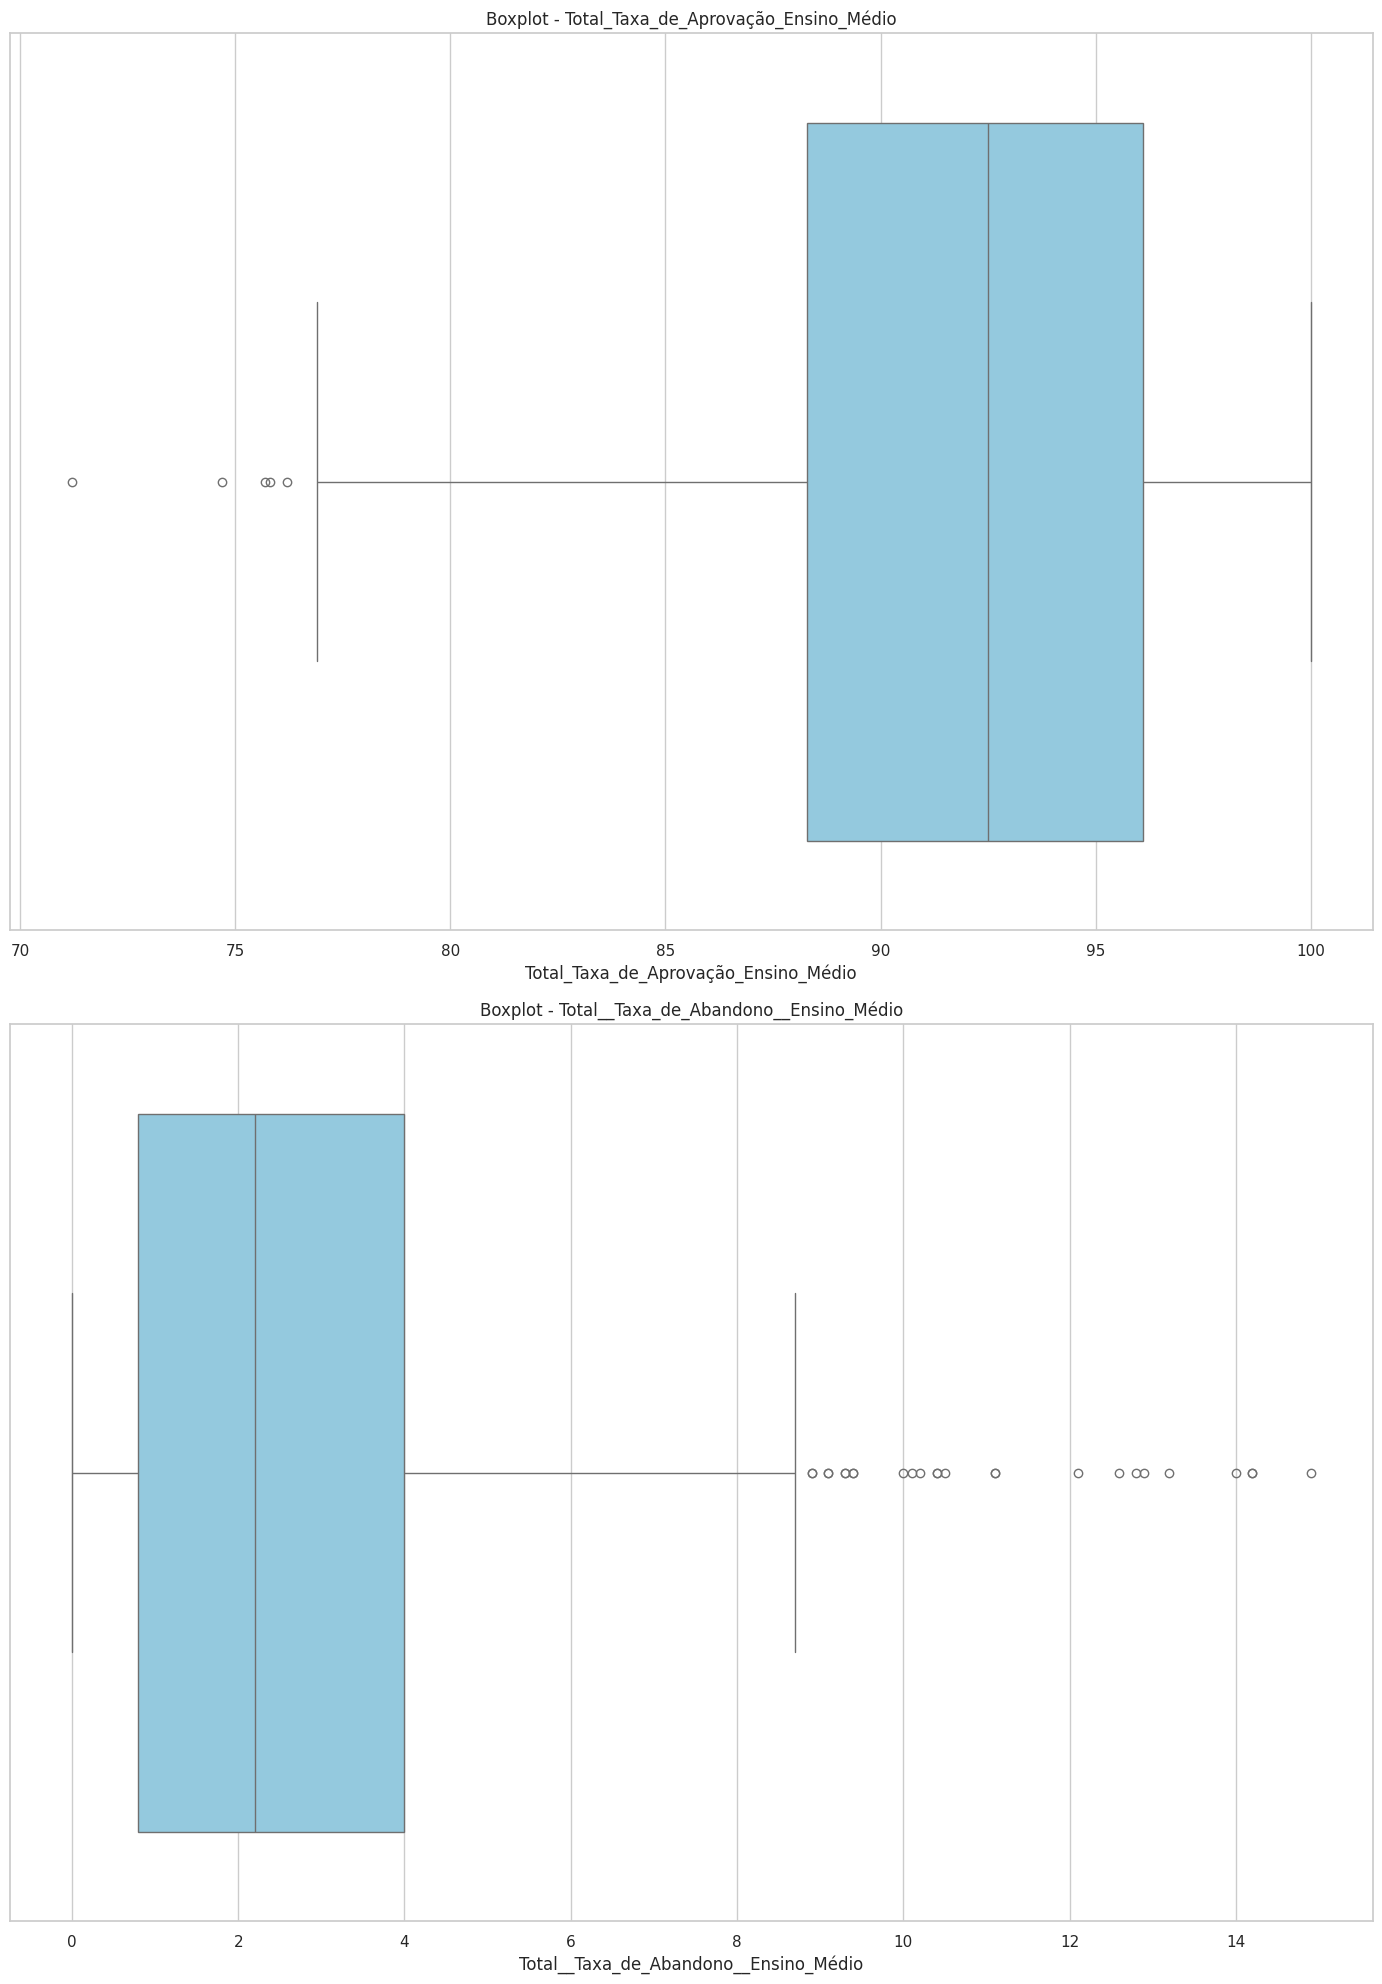

In [241]:
# Boxplots
sns.set(style="whitegrid")
plt.figure(figsize=(14, 20))
for i, col in enumerate(colunas_chave):
    plt.subplot(len(colunas_chave), 1, i+1)
    sns.boxplot(data=df_esc_limpo, x=col, color='skyblue')
    plt.title(f'Boxplot - {col}')
plt.tight_layout()
plt.show()

## Histogramas

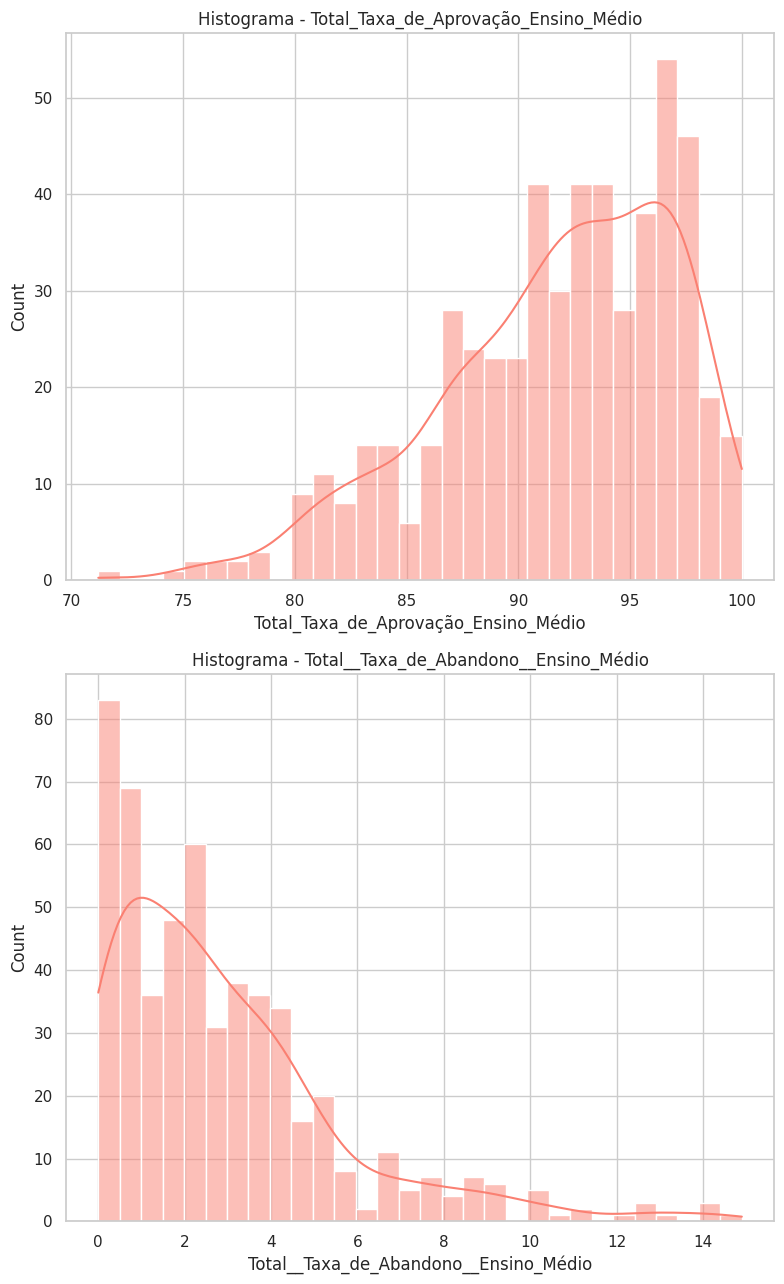

In [245]:
# Histogramas
plt.figure(figsize=(8, 13))
for i, col in enumerate(colunas_chave):
    plt.subplot(len(colunas_chave), 1, i+1)
    sns.histplot(data=df_esc_limpo, x=col, bins=30, kde=True, color='salmon')
    plt.title(f'Histograma - {col}')
plt.tight_layout()
plt.show()

## Análise de Outliers via IQR

In [244]:
# Análise de Outliers via IQR
for col in colunas_chave:
    Q1 = df_esc_limpo[col].quantile(0.25)
    Q3 = df_esc_limpo[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_esc_limpo[(df_esc_limpo[col] < Q1 - 1.5 * IQR) | (df_esc_limpo[col] > Q3 + 1.5 * IQR)]
    print(f"{col}: {len(outliers)} outlier(s)")

Total_Taxa_de_Aprovação_Ensino_Médio: 5 outlier(s)
Total__Taxa_de_Abandono__Ensino_Médio: 25 outlier(s)


📈 Médias por Grandes Regiões:
  Unidade_Geográfica  Total_Taxa_de_Aprovação_Ensino_Médio  \
0       Centro-Oeste                             93.377778   
1           Nordeste                             92.322222   
2              Norte                             94.323529   
3            Sudeste                             92.672222   
4                Sul                             89.122222   

   Total__Taxa_de_Abandono__Ensino_Médio  
0                               1.716667  
1                               3.250000  
2                               2.288235  
3                               2.216667  
4                               3.383333  


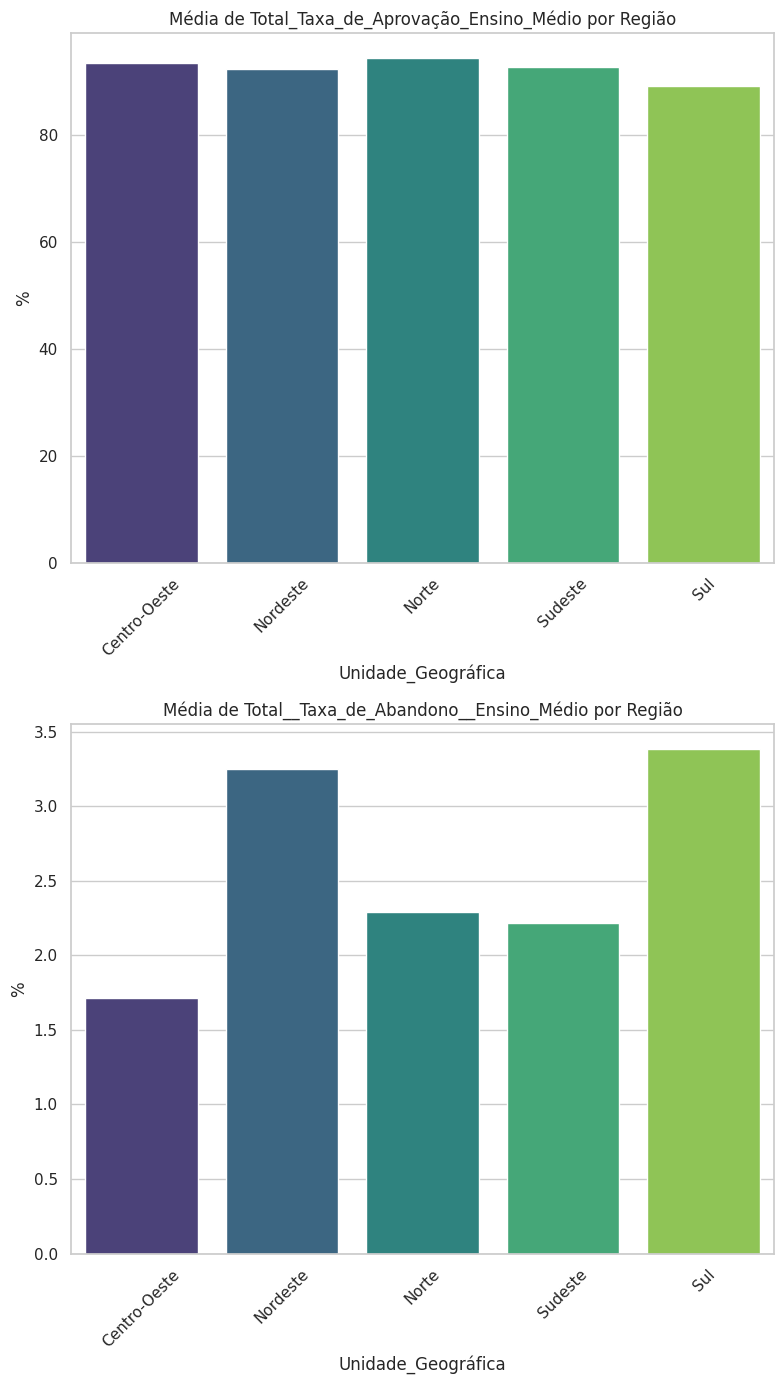

In [246]:
# Filtrar apenas as grandes regiões
df_regioes = df_esc_limpo[df_esc_limpo['Unidade_Geográfica'].isin(grandes_regioes)]

# Agrupar por região e calcular médias
agrupado_regiao = df_regioes.groupby('Unidade_Geográfica')[colunas_chave].mean().reset_index()

print("📈 Médias por Grandes Regiões:")
print(agrupado_regiao)

# Gráficos de barras atualizados (sem warnings)
plt.figure(figsize=(8, 14))
for i, col in enumerate(colunas_chave):
    plt.subplot(len(colunas_chave), 1, i+1)
    sns.barplot(
        data=agrupado_regiao,
        x='Unidade_Geográfica',
        y=col,
        hue='Unidade_Geográfica',
        palette='viridis',
        legend=False
    )
    plt.title(f'Média de {col} por Região')
    plt.xticks(rotation=45)
    plt.ylabel('%')
plt.tight_layout()
plt.show()
